In [ ]:
import arviz as az
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm

from tqdm.notebook import tqdm 

import tqdm as notebook_tqdm

In [ ]:
az.style.use("arviz-darkgrid")
plt.rcParams["figure.figsize"] = [8, 5] # 12, 7
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.facecolor"] = "white"

%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = "retina"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)

# Structural Time Series Models

## White Noise

**Definition**: a time series is characterized as **white noise** when it 
consists of a sequence of uncorrelated random variables, commonly modeled as 
Gaussian (normal) random variables:

$$
x_t = \epsilon_t \\
\epsilon_t \sim N(0, \sigma)
$$

*Observations*:

* **Mean**: The series has a mean of **zero**.
* **Constant Variance**: The variance of the series remains constant and finite 
over time.
* **No Autocorrelation**: There is no predictable pattern or trend in the series.
Each value is statistically independent of other values, implying no correlation 
between past, present, and future values in the series.



## Random Walk

**Definition**: A time series is characterized as following a **random walk** if, 
and only if, the difference between its consecutive values (i.e., the variation 
at each time step) constitutes *white noise*. 

$$
x_t - x_{t-1} = \epsilon_t \\
\epsilon_t \sim N(0, \sigma)
$$

*Observation*: This implies that the changes in the series from one period to the 
next are entirely random and unpredictable, with no discernible pattern or trend, 
meaning that *each change* is **independent** of *past changes*.

## Basic Structural Time Series Model

**Definition** - the **Basic Structural Model** is a framework in time series 
analysis that decomposes a time series into three distinct components: **trend**, 
**cycle**, and **noise**.

$$
y_t = \mu_t + \gamma_t + \epsilon_t
$$

* $\mu_t$: **trend** represents the long-term progression of the series.
* $\gamma_t$: **cycle** accounts for regular but not necessarily seasonal 
fluctuations in the time series.
* $\epsilon_t \sim N(0, \sigma_{\epsilon})$: This is the **random error**, the 
**noise** or the **irregular component** of the series.

### Local Level Trend

The **trend** is a **random walk** (equivalent to: "the **1-step changes** in the
trend are modeled as **white noise**"): 

$$
\mu_t - \mu_{t-1} = \xi_t
$$

With:

$$
\xi_t \sim N(0, \sigma_{\mu})
$$

Alternatively:

$$
\mu_t \sim N(\mu_{t-1}, \sigma_{\mu})
$$



### Stochastic Trend

The **1-step changes in the trend** are modeled as **random walk** plus 
**white noise**:

$$
\mu_t - \mu_{t-1} = \beta_t + \xi_t \\
\beta_t - \beta_{t-1} = \eta_t
$$

Where:

$$
\xi_t \sim N(0, \sigma_{\mu}) \\
\eta_t \sim N(0, \sigma_{\beta})
$$

Alternatively:

$$
\mu_t \sim N(\mu_{t-1} + \beta_t, \sigma_{\mu}) \\
\beta_t \sim N(\beta_{t-1}, \sigma_{\beta})
$$

*Observation*
Here it is usual to distinguish between:
* **(Local) Level**, $\mu_t$: The baseline value of the series, representing its 
**long-term** average or trend.
* **(Local) Trend**, $\beta_t$: A component that captures the gradual, long-term 
movement in the series. Unlike the level, which is more static, the trend is 
dynamic and can change over time, representing either an upward or downward 
direction in the data.


# Simulation

<Axes: xlabel='t'>

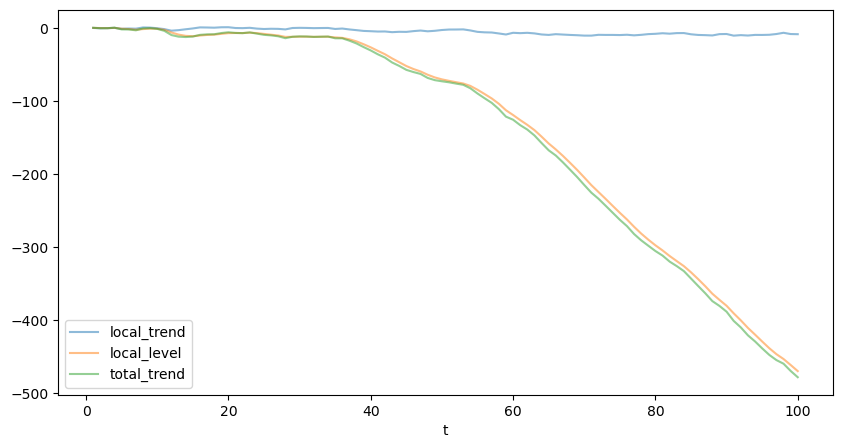

In [7]:
import numpy as np
import pandas as pd

N = 100

sigma_local_trend = 1
sigma_local_level = .1

# local trend is a random walk
diff_local_trend = np.random.normal(0, sigma_local_trend, N)
local_trend = np.cumsum(diff_local_trend)

# local level is the local trend plus noise
diff_local_level = np.random.normal(local_trend, sigma_local_level, N)
local_level = np.cumsum(diff_local_level)

# dataframe with t = 1:N, local_trend, local_level
df = pd.DataFrame(
    {
        "t": np.arange(1, N + 1),
        "local_trend": local_trend,
        "local_level": local_level,
    }
).assign(
    # total trend as trend + level
    total_trend=lambda x: x.local_trend + x.local_level,
)

# plot local_trend and local_level vs t
df.plot(x="t", y=["local_trend", "local_level", "total_trend"], figsize=(10, 5), alpha=0.5)

In [9]:
df.tail()

,t,local_trend,local_level,total_trend
95,96,-9.171044,-438.918210,-448.089254
96,97,-8.138745,-447.066283,-455.205028
97,98,-6.446138,-453.712127,-460.158265
98,99,-8.166519,-461.890770,-470.057289
99,100,-8.380526,-470.321927,-478.702453
